# First import the necessary library

In [1]:
from onset_functions import *
import onset_widgets as w

# Choose the spacecraft, sensor, view direction and particle species:

In [2]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', options=('STEREO-A', 'STEREO-B', 'Solar Orbiter', 'Bepicolombo', 'SOHO'), …

Dropdown(description='Sensor:', options=('LET', 'SEPT', 'HET'), value='LET')

Dropdown(description='Viewing:', disabled=True, options=(), value=None)

Dropdown(description='Species:', options=('p', 'e'), value='p')

# Set the date of the event and path to your data folder:

In [3]:
# Date of the event as an integer YYYYMMDD
event_date = 20210715

# Path for the downloaded data
data_path = f"{os.getcwd()}/"

# Path to save plots
plot_path = f'{os.getcwd()}/'

# See that the input is correct:

In [4]:
w.confirm_input(event_date, data_path, plot_path)

You've chosen the following options:
Spacecraft: STEREO-A
Sensor: SEPT
Species: e
Viewing: asun
Event_date: 20210715
Data_path: /home/chospa/Documents/Github/SPOT/
Plot_path: /home/chospa/Documents/Github/SPOT/


# Set the temporal range for the daily data files and create the Event object:

In [5]:
startdate = datetime.date(2021, 7, 15)
enddate = datetime.date(2021, 7, 16)

# Get event data:
event_onset = Event(spacecraft=w.input_dict["Spacecraft"], sensor=w.input_dict["Sensor"], 
                    data_level='l2', species = w.input_dict["Species"],
                    start_date=startdate, end_date=enddate, 
                    data_path=w.input_dict["Data_path"])

# Set the averaging period and background start and length in hours (e.g. 3, 8.1)

In [10]:
# Use pandas-compatible resampling period string, e.g. '10min' or '30s'
# Leave to None to not resample data
averaging = "5min"

# How many hours from the start of the plot does averaging start? How many hour is 
# the background averaging period long?
background_start = 1
background_length = 10

##### >Energy channels< #####
45-55 keV
#############################

##### >Flux peak< #####
time
2021-07-16 15:37:30    124.7004
Freq: 5T, Name: ch_2, dtype: float64
#######################

##### >Onset time< #####
2021-07-16 19:52:30
########################

##### >Mean of background intensity< #####
32.32362505555556
##########################################

##### >Std of background intensity< #####
13.900204049748652
#########################################

##### >Particle species< #####
electrons
##############################



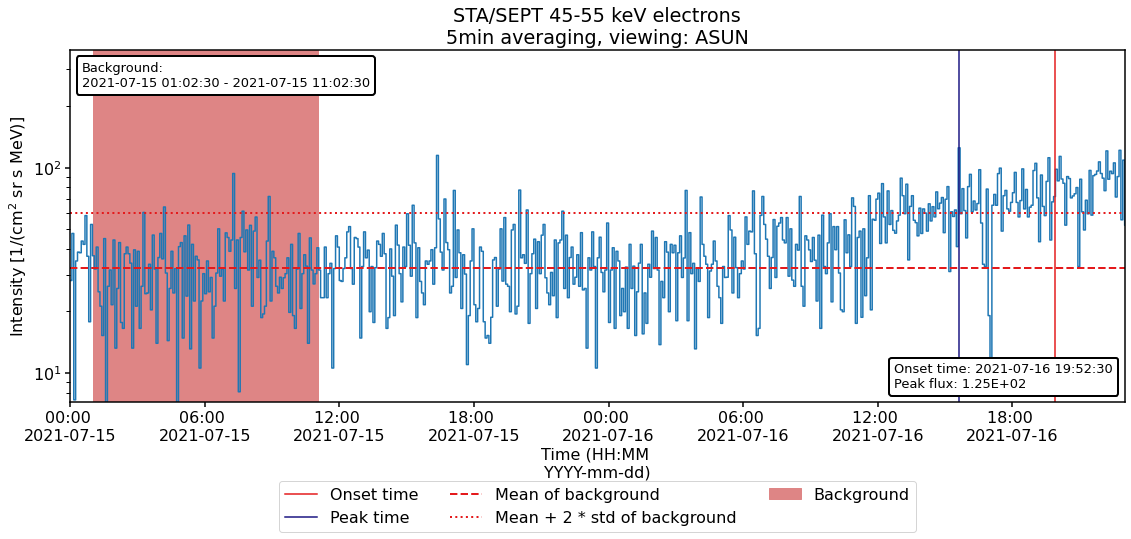

In [11]:
# Set the channel(s) to plot as a list:
channels = [2,]

# Set the time range:
plot_range = [datetime.datetime(2021, 7, 15, 0),datetime.datetime(2021, 7, 16, 23)]

flux, onset_stats, onset_found, peak_flux, peak_time, fig, bg_mean = event_onset.analyse(viewing=w.input_dict["Viewing"], bg_start=background_start, bg_length=background_length, channels=channels,
                                                                                         resample_period=averaging, yscale='log', cusum_window=30, xlim=plot_range)
onset = onset_stats[-1]
peak_flux = peak_flux.values[0]
output = event_onset.output

# output is a dictionary, that contains 'flux_series', 'onset_stats', 'onset_found', 'onset', 'peak_flux', 'peak_time', 'fig' and 'bg_mean'

In [12]:
print(f"Onset: {output['onset']}")
print(f"Peak flux: {output['peak_flux']:.2e}")
print(f"Peak time: {output['peak_time']}")
print(f"Bg mean: {output['bg_mean']:.2e}")

Onset: 2021-07-16 19:52:30
Peak flux: 1.25e+02
Peak time: 2021-07-16 15:37:30
Bg mean: 3.23e+01


# Saving figures

In [17]:
# Use a pre-generated name for the file:
file_name = f"{w.input_dict['Plot_path']}{w.input_dict['Spacecraft']}_{w.input_dict['Sensor']}_{w.input_dict['Species']}_{event_date}_{averaging}.png"

# Or type your own here:
# file_name = ""

In [18]:
# Check that the name is right
print(file_name)

/home/chospa/Documents/Github/SPOT/sta_SEPT_e_20210715_5min.png


In [38]:
#Save maximum peak flux plot
fig.savefig(file_name, facecolor= 'white', transparent=False)